# Player League Player Data Analysis

In this notebook I want to explore a dataset which I scraped from:
https://understat.com/league/EPL/2019
Which includes the stats of all the premier league players from the 2019/2020 season.

The champions were Liverpool FC.

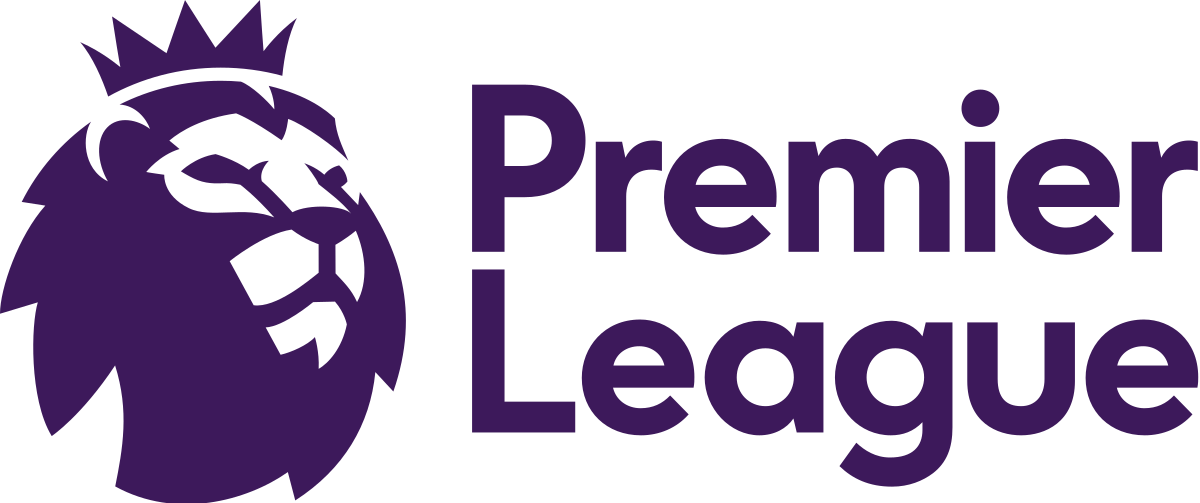

Some explorations I want to make:
 - Top goalscorers in the 2019/2020
 - Top assists in the 2019/2020
 - Top team goals in the 2019/2020
 - Players that went above and beyond in goals and assists in 2019/2020
 - Players that didn't meet expectations with goals and assists in 2019/2020 season

In [1]:
!jt -t grade3 -tfs 15
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

players = pd.read_csv('Downloads\sports-data-final-3.csv')
players.head()

# labeling players on loan with the team they are loans as their stats contribute to the loan team
def loan(x):
    if ',' in x:
        split = x.split(',')
        return split[1].strip()
    else:
        return x

players['Team'] = players['Team'].apply(lambda x: loan(x))

### Visualizing Top Goalscorers and Team Goals

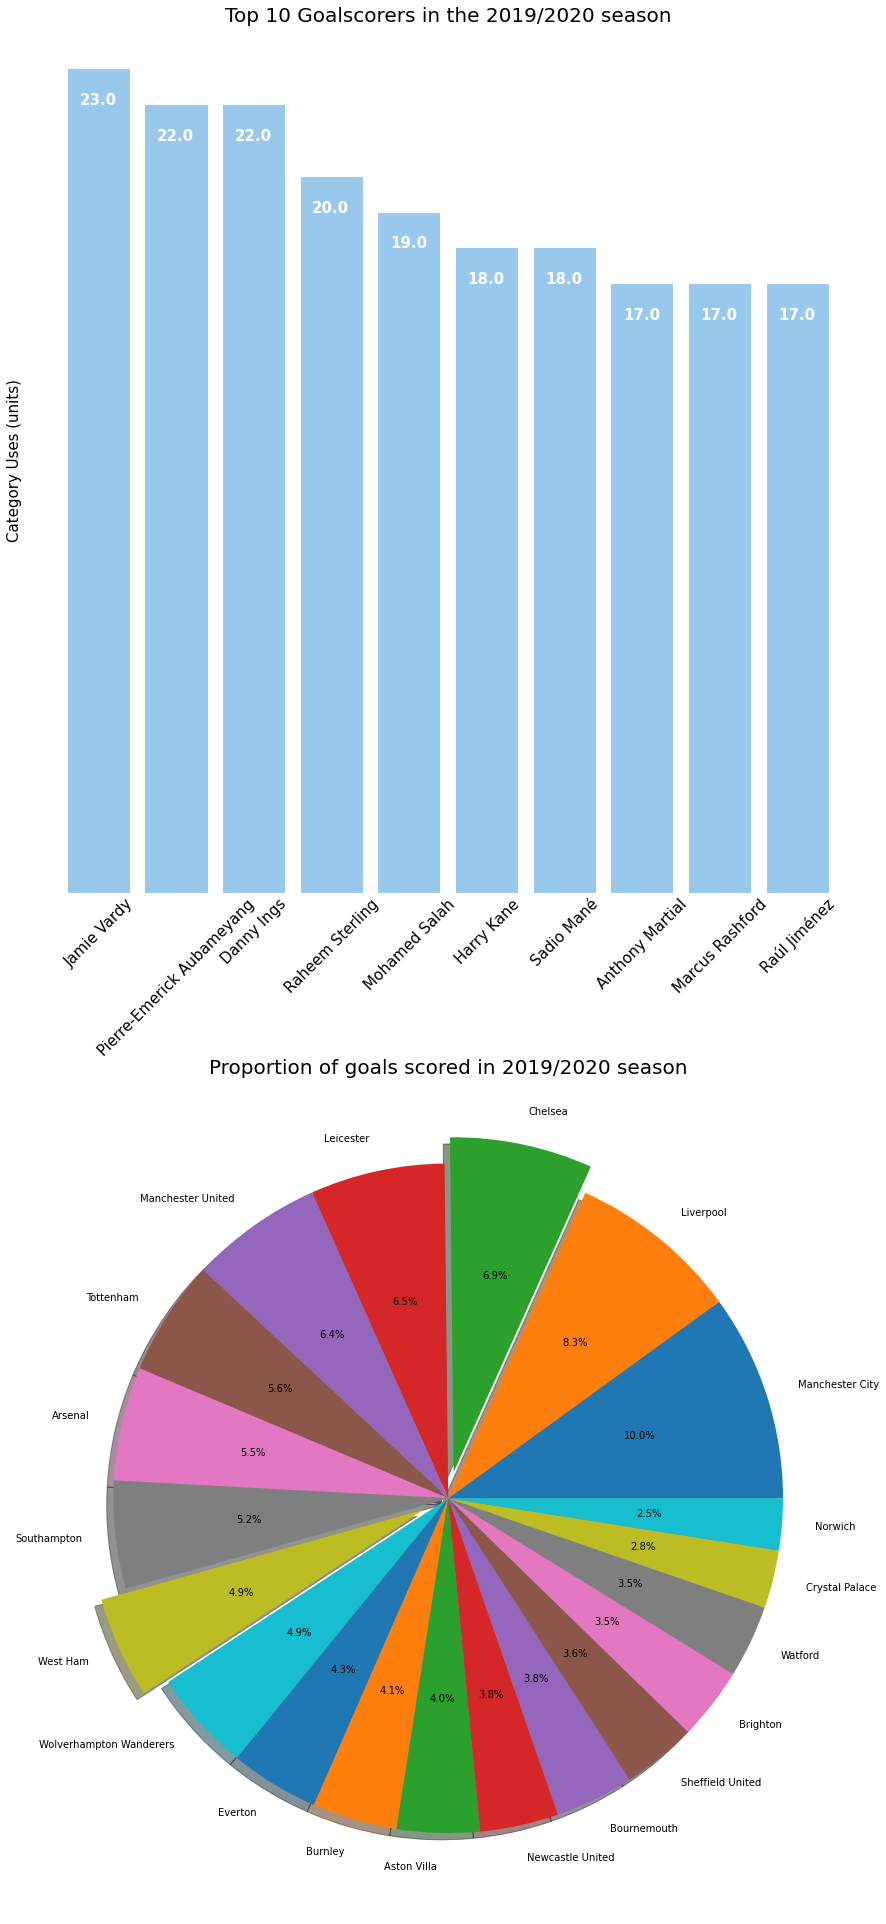

In [2]:
top_goalscorers = players.sort_values('G', ascending=False)[:10]

fig, ax = plt.subplots(2, 1, figsize=(15,35))
top_team_goals = players.groupby('Team').sum().sort_values('G', ascending=False)
top_team_goals

ax[0].bar(top_goalscorers['Player'], top_goalscorers['G'], color=(152/255, 200/255, 236/255))
ax[0].set_xticklabels(top_goalscorers['Player'], rotation=45, fontsize=15)
ax[0].set_title('Top 10 Goalscorers in the 2019/2020 season', fontsize=20)
ax[0].set_ylabel('Category Uses (units)', fontsize=15)
ax[0].set_yticklabels([])
ax[0].tick_params(axis=u'both', which=u'both',length=0)

for i, v in enumerate(list(top_goalscorers['G'])):
    ax[0].text(i-.25, v-1, str(v), color='white', fontweight='bold', fontsize=15)

for key, spine in ax[0].spines.items():
    spine.set_visible(False)

ax[1].pie(top_team_goals['G'], labels=top_team_goals.index, shadow=True, autopct='%1.1f%%', explode=(0, 0, 0.08, 0, 0, 0, 0, 0, 0.08, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))
ax[1].set_title('Proportion of goals scored in 2019/2020 season', fontsize=20)

plt.show()

### Visualizing Top  Assisters

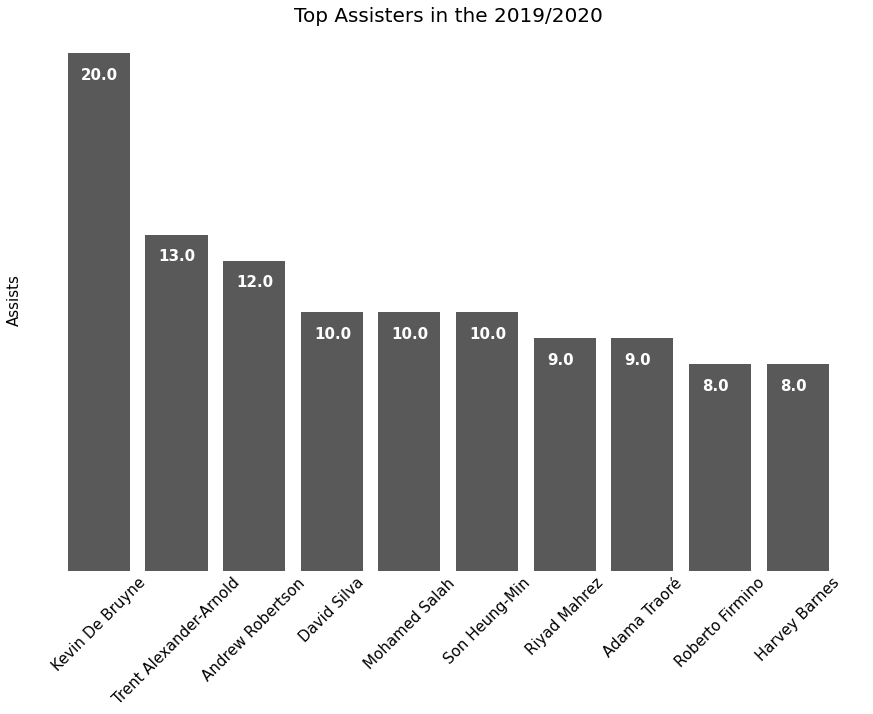

In [3]:
top_assisters = players.sort_values('A', ascending=False)[:10]

fig, ax = plt.subplots(1, 1, figsize=(15,10))


ax.bar(top_assisters['Player'], top_assisters['A'], color=(89/255, 89/255, 89/255))
ax.set_xticklabels(top_assisters['Player'], rotation=45, fontsize=15)
ax.set_title('Top Assisters in the 2019/2020', fontsize=20)
ax.set_ylabel('Assists', fontsize=15)
ax.set_yticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

for i, v in enumerate(list(top_assisters['A'])):
    ax.text(i-.23, v-1, str(v), color='white', fontweight='bold', fontsize=15)

for key, spine in ax.spines.items():
    spine.set_visible(False)

### Visualizing players that went above expectation with goals

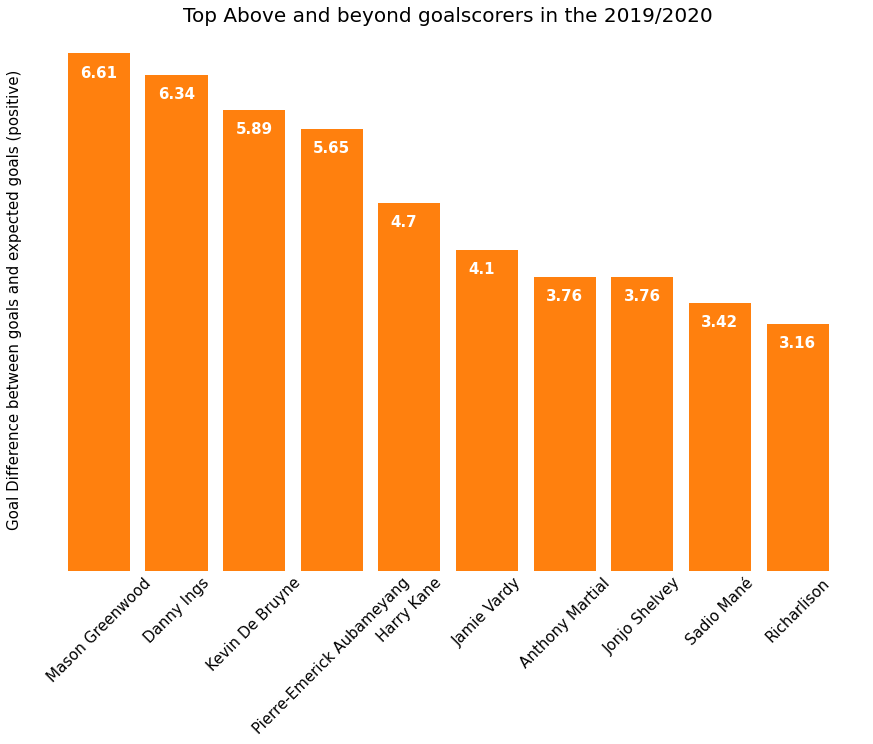

In [4]:
top_abb_goals = players.sort_values('xGDiff', ascending=True)[:10]
top_abb_goals

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.bar(top_abb_goals['Player'], top_abb_goals['xGDiff'].apply(lambda x: abs(x)), color=(255/255, 128/255, 14/255))
ax.set_xticklabels(top_abb_goals['Player'], rotation=45, fontsize=15)
ax.set_title('Top Above and beyond goalscorers in the 2019/2020', fontsize=20)
ax.set_ylabel('Goal Difference between goals and expected goals (positive)', fontsize=15)
ax.set_yticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

for i, v in enumerate(list(top_abb_goals['xGDiff'].apply(lambda x: abs(x)))):
    ax.text(i-.24, v-0.3, str(v), color='white', fontweight='bold', fontsize=15)

for key, spine in ax.spines.items():
    spine.set_visible(False)

### Visualizing players that were below expectations for goals

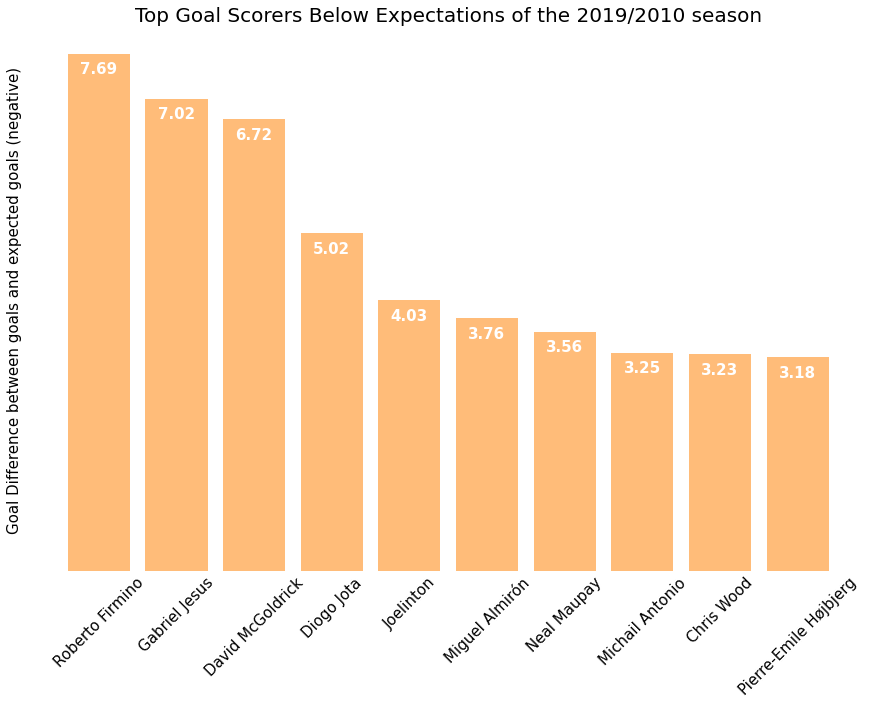

In [5]:
top_f_goals = players.sort_values('xGDiff', ascending=False)[:10]
top_f_goals

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.bar(top_f_goals['Player'], top_f_goals['xGDiff'], color=(255/255, 188/255, 121/255))
ax.set_xticklabels(top_f_goals['Player'], rotation=45, fontsize=15)
ax.set_title('Top Goal Scorers Below Expectations of the 2019/2010 season', fontsize=20)
ax.set_ylabel('Goal Difference between goals and expected goals (negative)', fontsize=15)
ax.set_yticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

for i, v in enumerate(list(top_f_goals['xGDiff'].apply(lambda x: abs(x)))):
    ax.text(i-.24, v-0.3, str(v), color='white', fontweight='bold', fontsize=15)

for key, spine in ax.spines.items():
    spine.set_visible(False)

### Visualizing players that went above expectation with assists

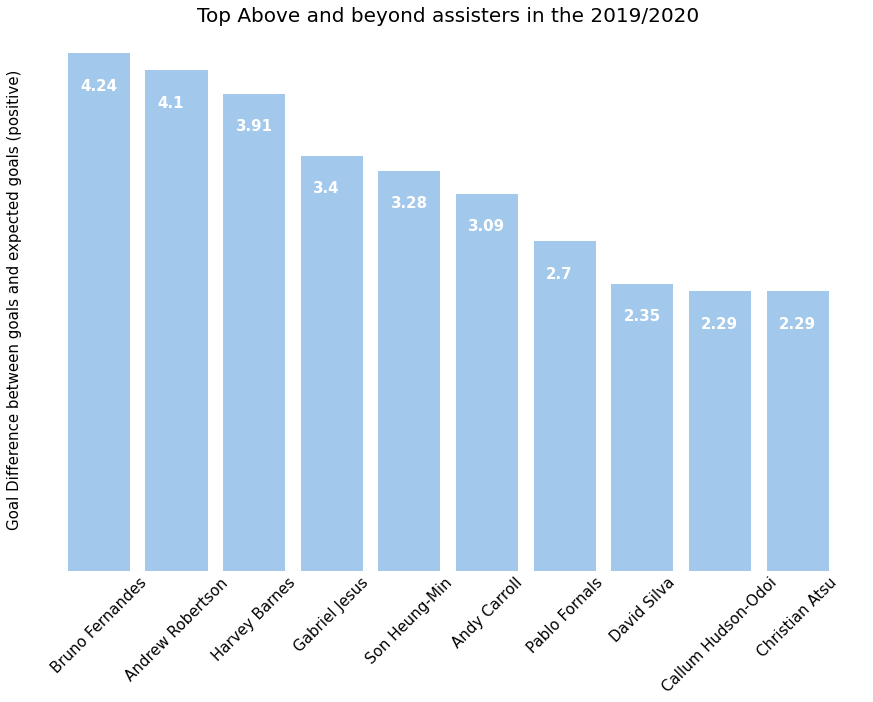

In [6]:
top_abb_assists = players.sort_values('xADiff', ascending=True)[:10]
top_abb_assists### Visualizing players that were below expectations for goals

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.bar(top_abb_assists['Player'], top_abb_assists['xADiff'].apply(lambda x: abs(x)), color=(162/255, 200/255, 236/255))
ax.set_xticklabels(top_abb_assists['Player'], rotation=45, fontsize=15)
ax.set_title('Top Above and beyond assisters in the 2019/2020', fontsize=20)
ax.set_ylabel('Goal Difference between goals and expected goals (positive)', fontsize=15)
ax.set_yticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

for i, v in enumerate(list(top_abb_assists['xADiff'].apply(lambda x: abs(x)))):
    ax.text(i-.24, v-0.3, str(v), color='white', fontweight='bold', fontsize=15)

for key, spine in ax.spines.items():
    spine.set_visible(False)

### Visualizing players that were below expectations for assists

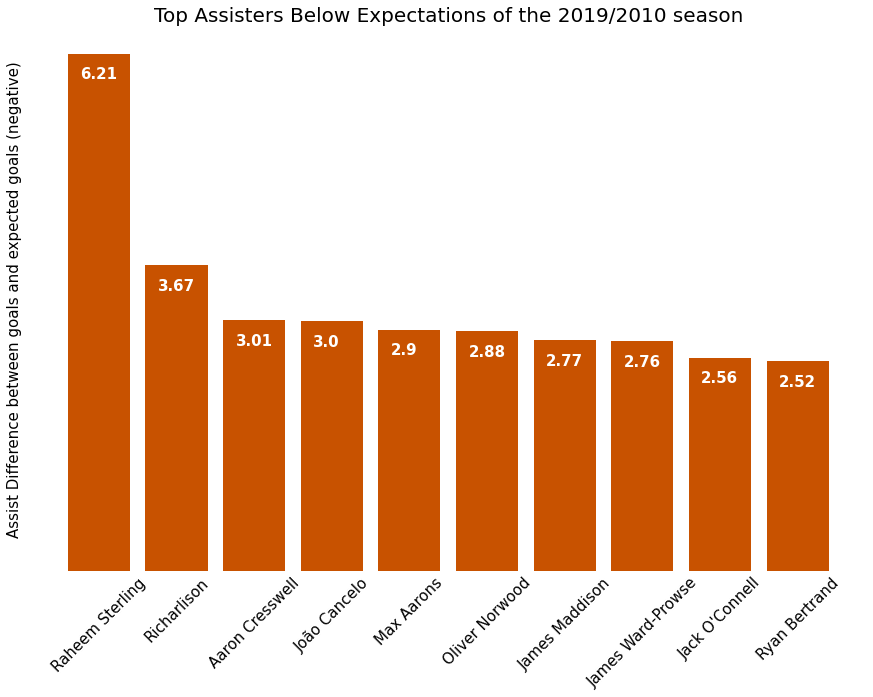

In [7]:
top_f_goals = players.sort_values('xADiff', ascending=False)[:10]
top_f_goals

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.bar(top_f_goals['Player'], top_f_goals['xADiff'], color=(200/255, 82/255, 0/255))
ax.set_xticklabels(top_f_goals['Player'], rotation=45, fontsize=15)
ax.set_title('Top Assisters Below Expectations of the 2019/2010 season', fontsize=20)
ax.set_ylabel('Assist Difference between goals and expected goals (negative)', fontsize=15)
ax.set_yticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

for i, v in enumerate(list(top_f_goals['xADiff'].apply(lambda x: abs(x)))):
    ax.text(i-.24, v-0.3, str(v), color='white', fontweight='bold', fontsize=15)

for key, spine in ax.spines.items():
    spine.set_visible(False)

### Highest goalscorers for each team in the premier league season 2019/2020

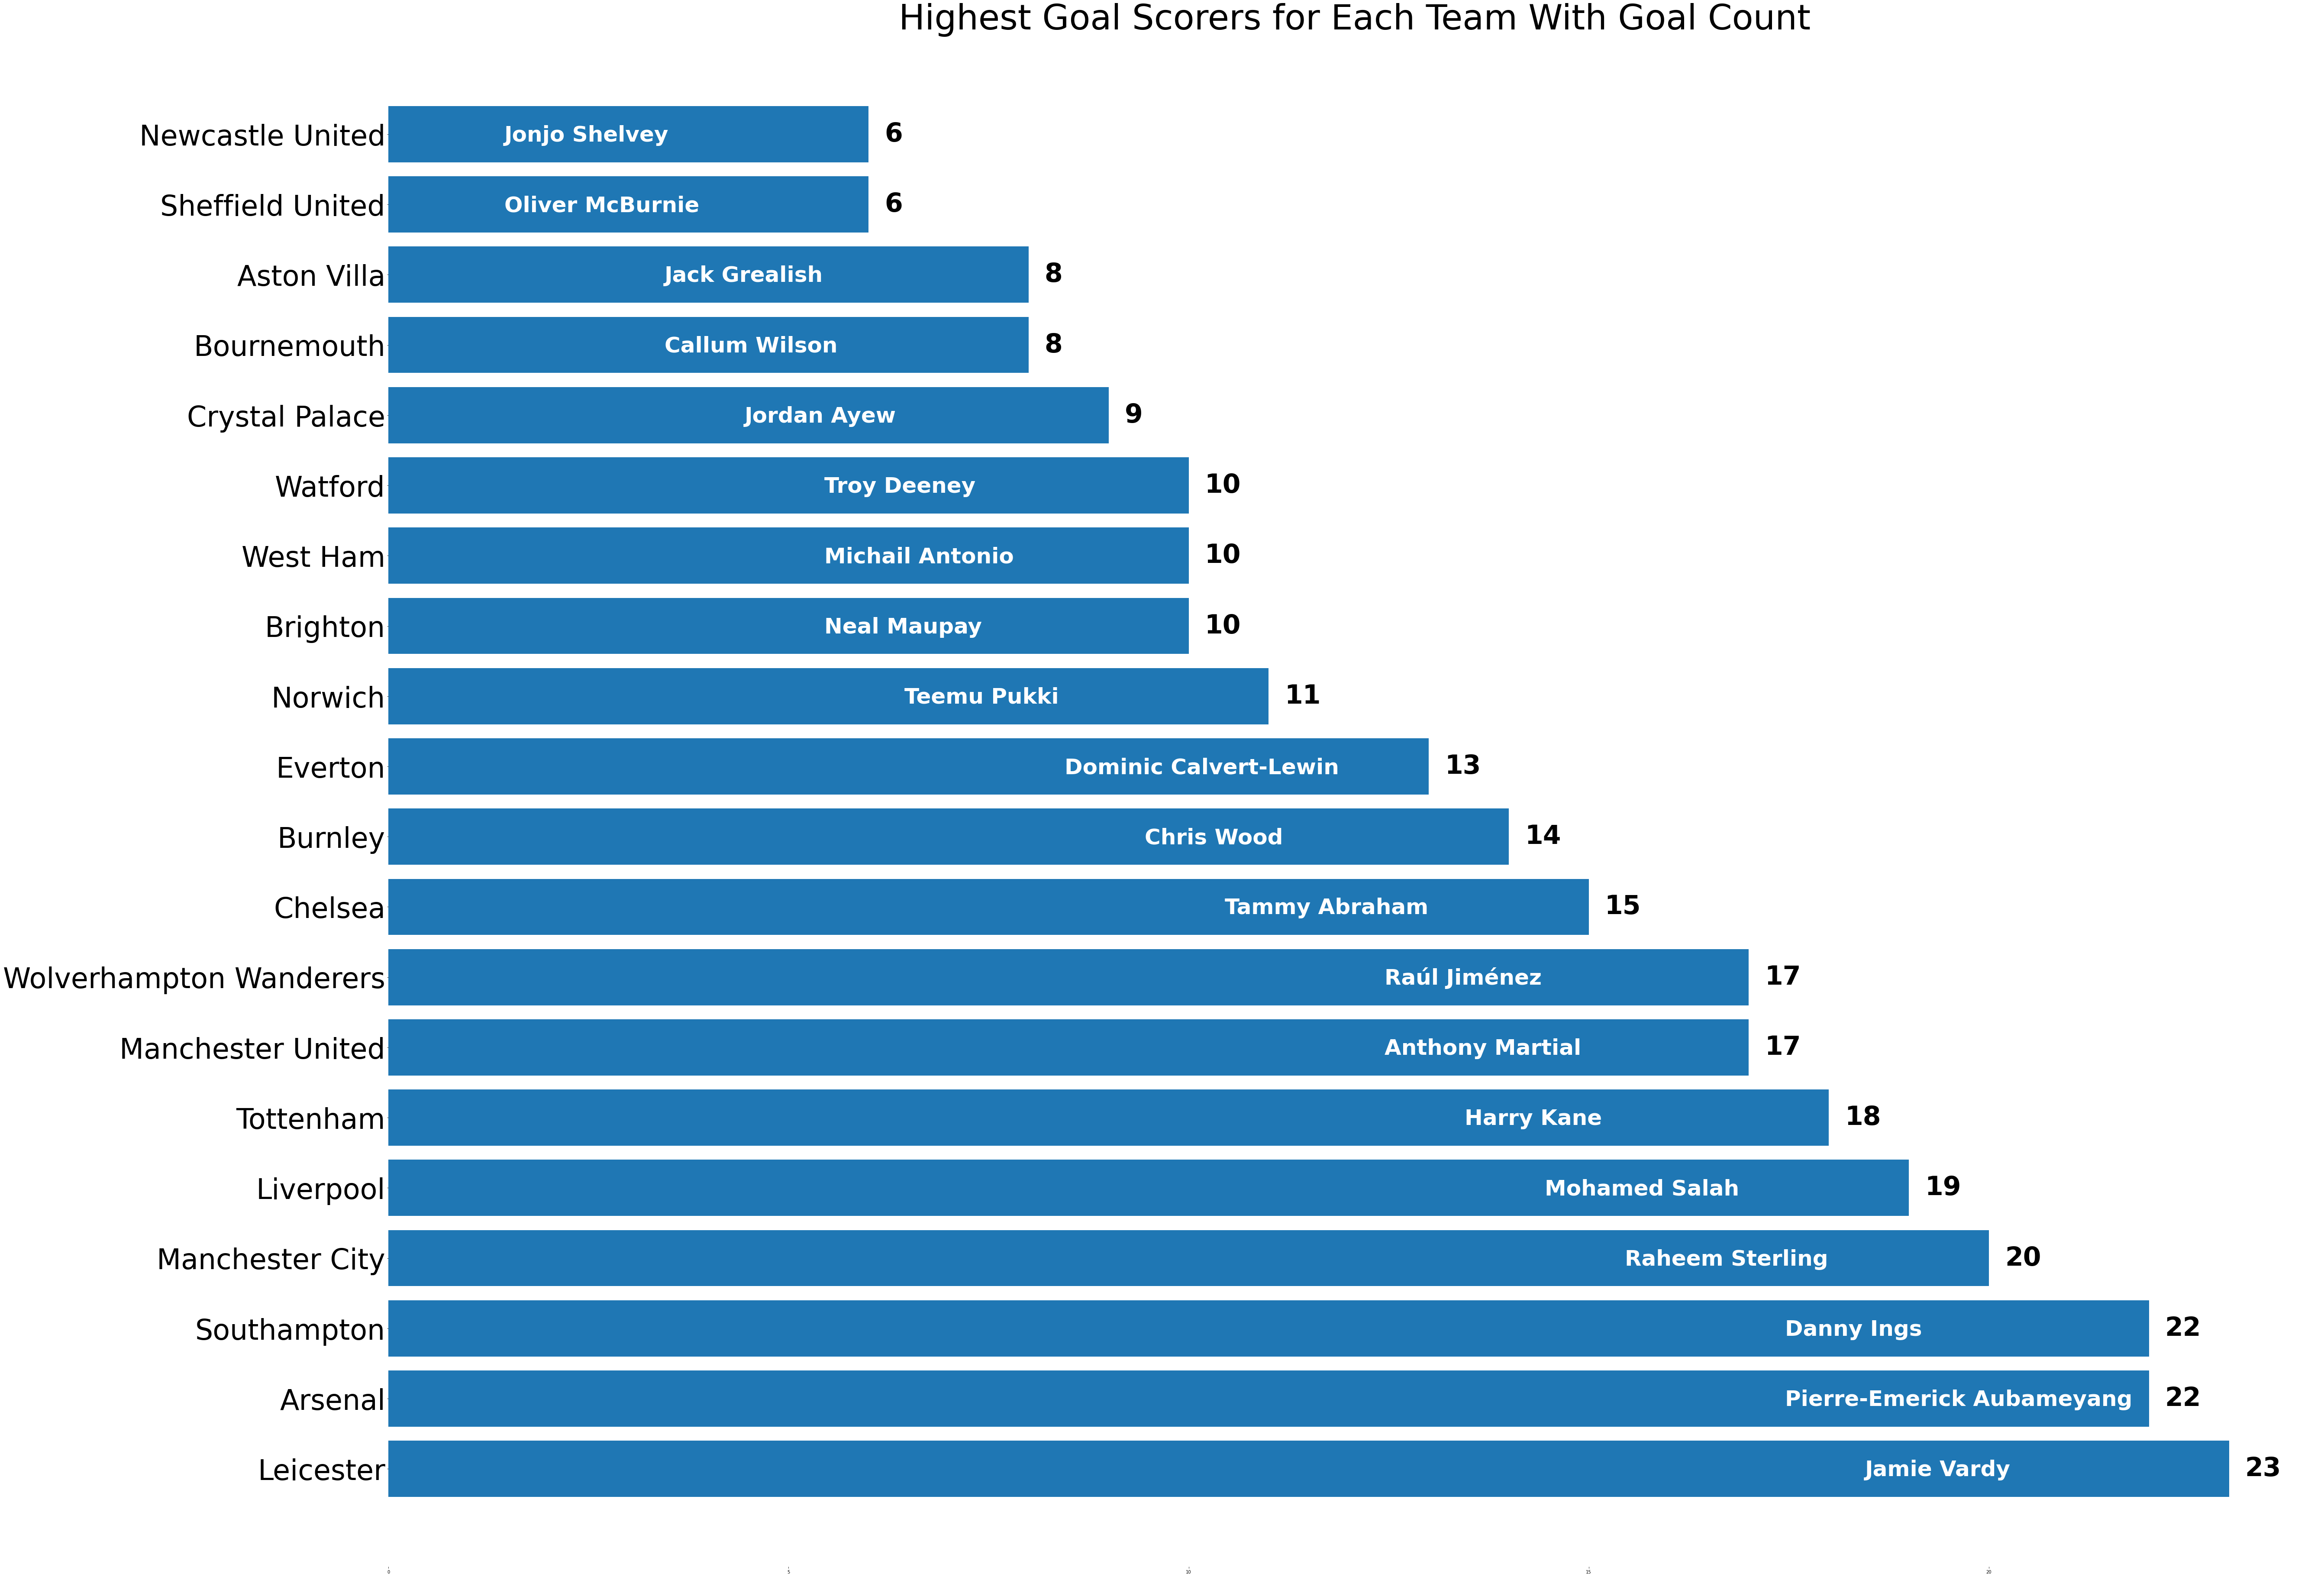

In [8]:
top_team_goals = players.sort_values('G',ascending=False).groupby('Team').head(1).reset_index(drop=True)
top_team_goals

fig, ax = plt.subplots(1, 1, figsize=(80,65))

ax.barh(top_team_goals['Team'], top_team_goals['G'])
ax.set_yticklabels(top_team_goals['Team'], fontsize=65)
ax.set_title('Highest Goal Scorers for Each Team With Goal Count', fontsize=80)

for i, v in top_team_goals.iterrows():
    ax.text(v['G'] - 4.55, i-0.1, v['Player'], color='white', fontweight='bold', fontsize=50)
    ax.text(v['G']+0.2, i-0.1, int(v['G']), color='black', fontweight='bold', fontsize=60)
    
for key, spine in ax.spines.items():
    spine.set_visible(False)


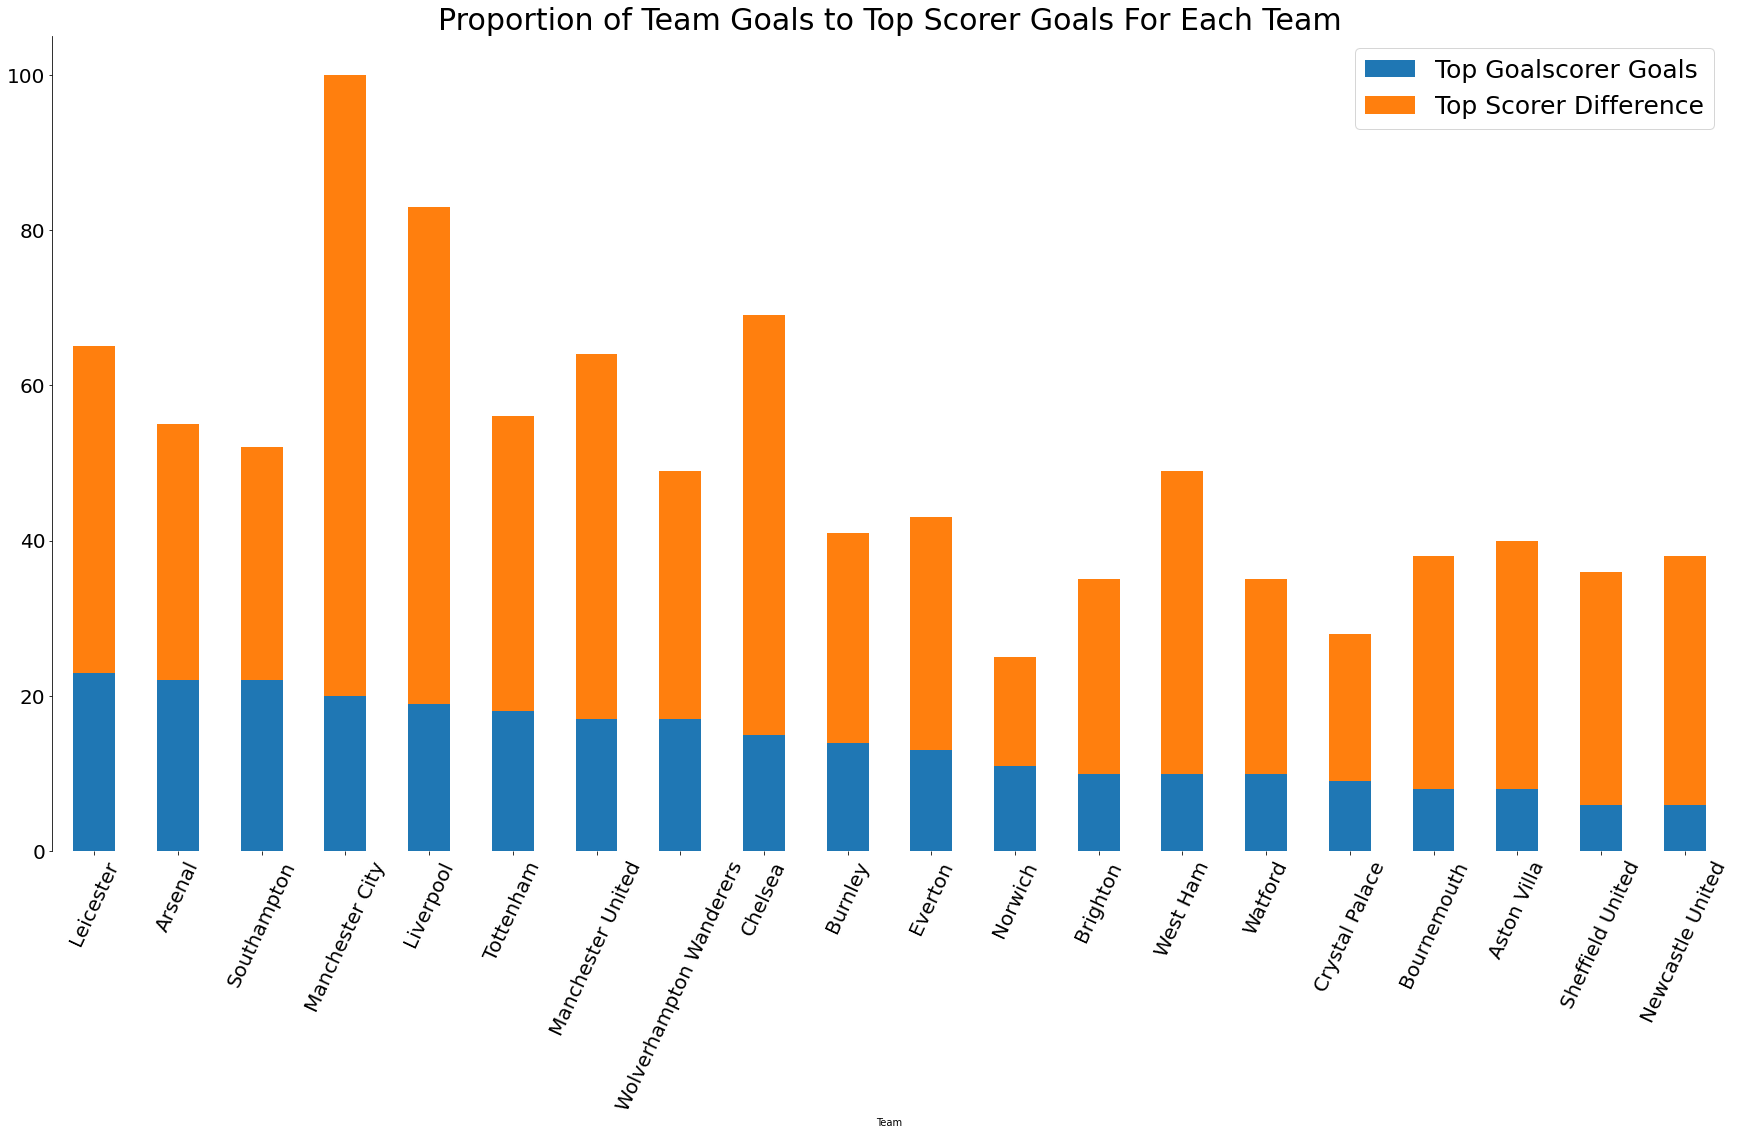

In [9]:
top_team_goals = players.sort_values('G',ascending=False).groupby('Team').head(1)
top_team_goals

def get_team_goals(team):
    team_goals = players.groupby('Team').get_group(team).sum()['G']
    
    return team_goals

top_team_goals['Team Goals'] = top_team_goals['Team'].apply(lambda x: get_team_goals(x))
top_team_goals['Percentage of Team Goals'] = top_team_goals['G'] / top_team_goals['Team Goals']
top_team_goals['Top Scorer Difference'] = top_team_goals['Team Goals'] - top_team_goals['G']

top_team_goals = top_team_goals.rename(columns={"G": "Top Goalscorer Goals"})


top_team_goals = top_team_goals.set_index('Team')
top_team_goals

top_team_goals[['Top Goalscorer Goals','Top Scorer Difference']].plot.bar(figsize=(30,15), stacked=True)
plt.xticks(fontsize=20, rotation=65)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 25})
plt.title('Proportion of Team Goals to Top Scorer Goals For Each Team', fontsize=30)

for pos in ['right','top','bottom']:
    plt.gca().spines[pos].set_visible(False)


### Highest assisters for each team in the premier league season 2019/2020

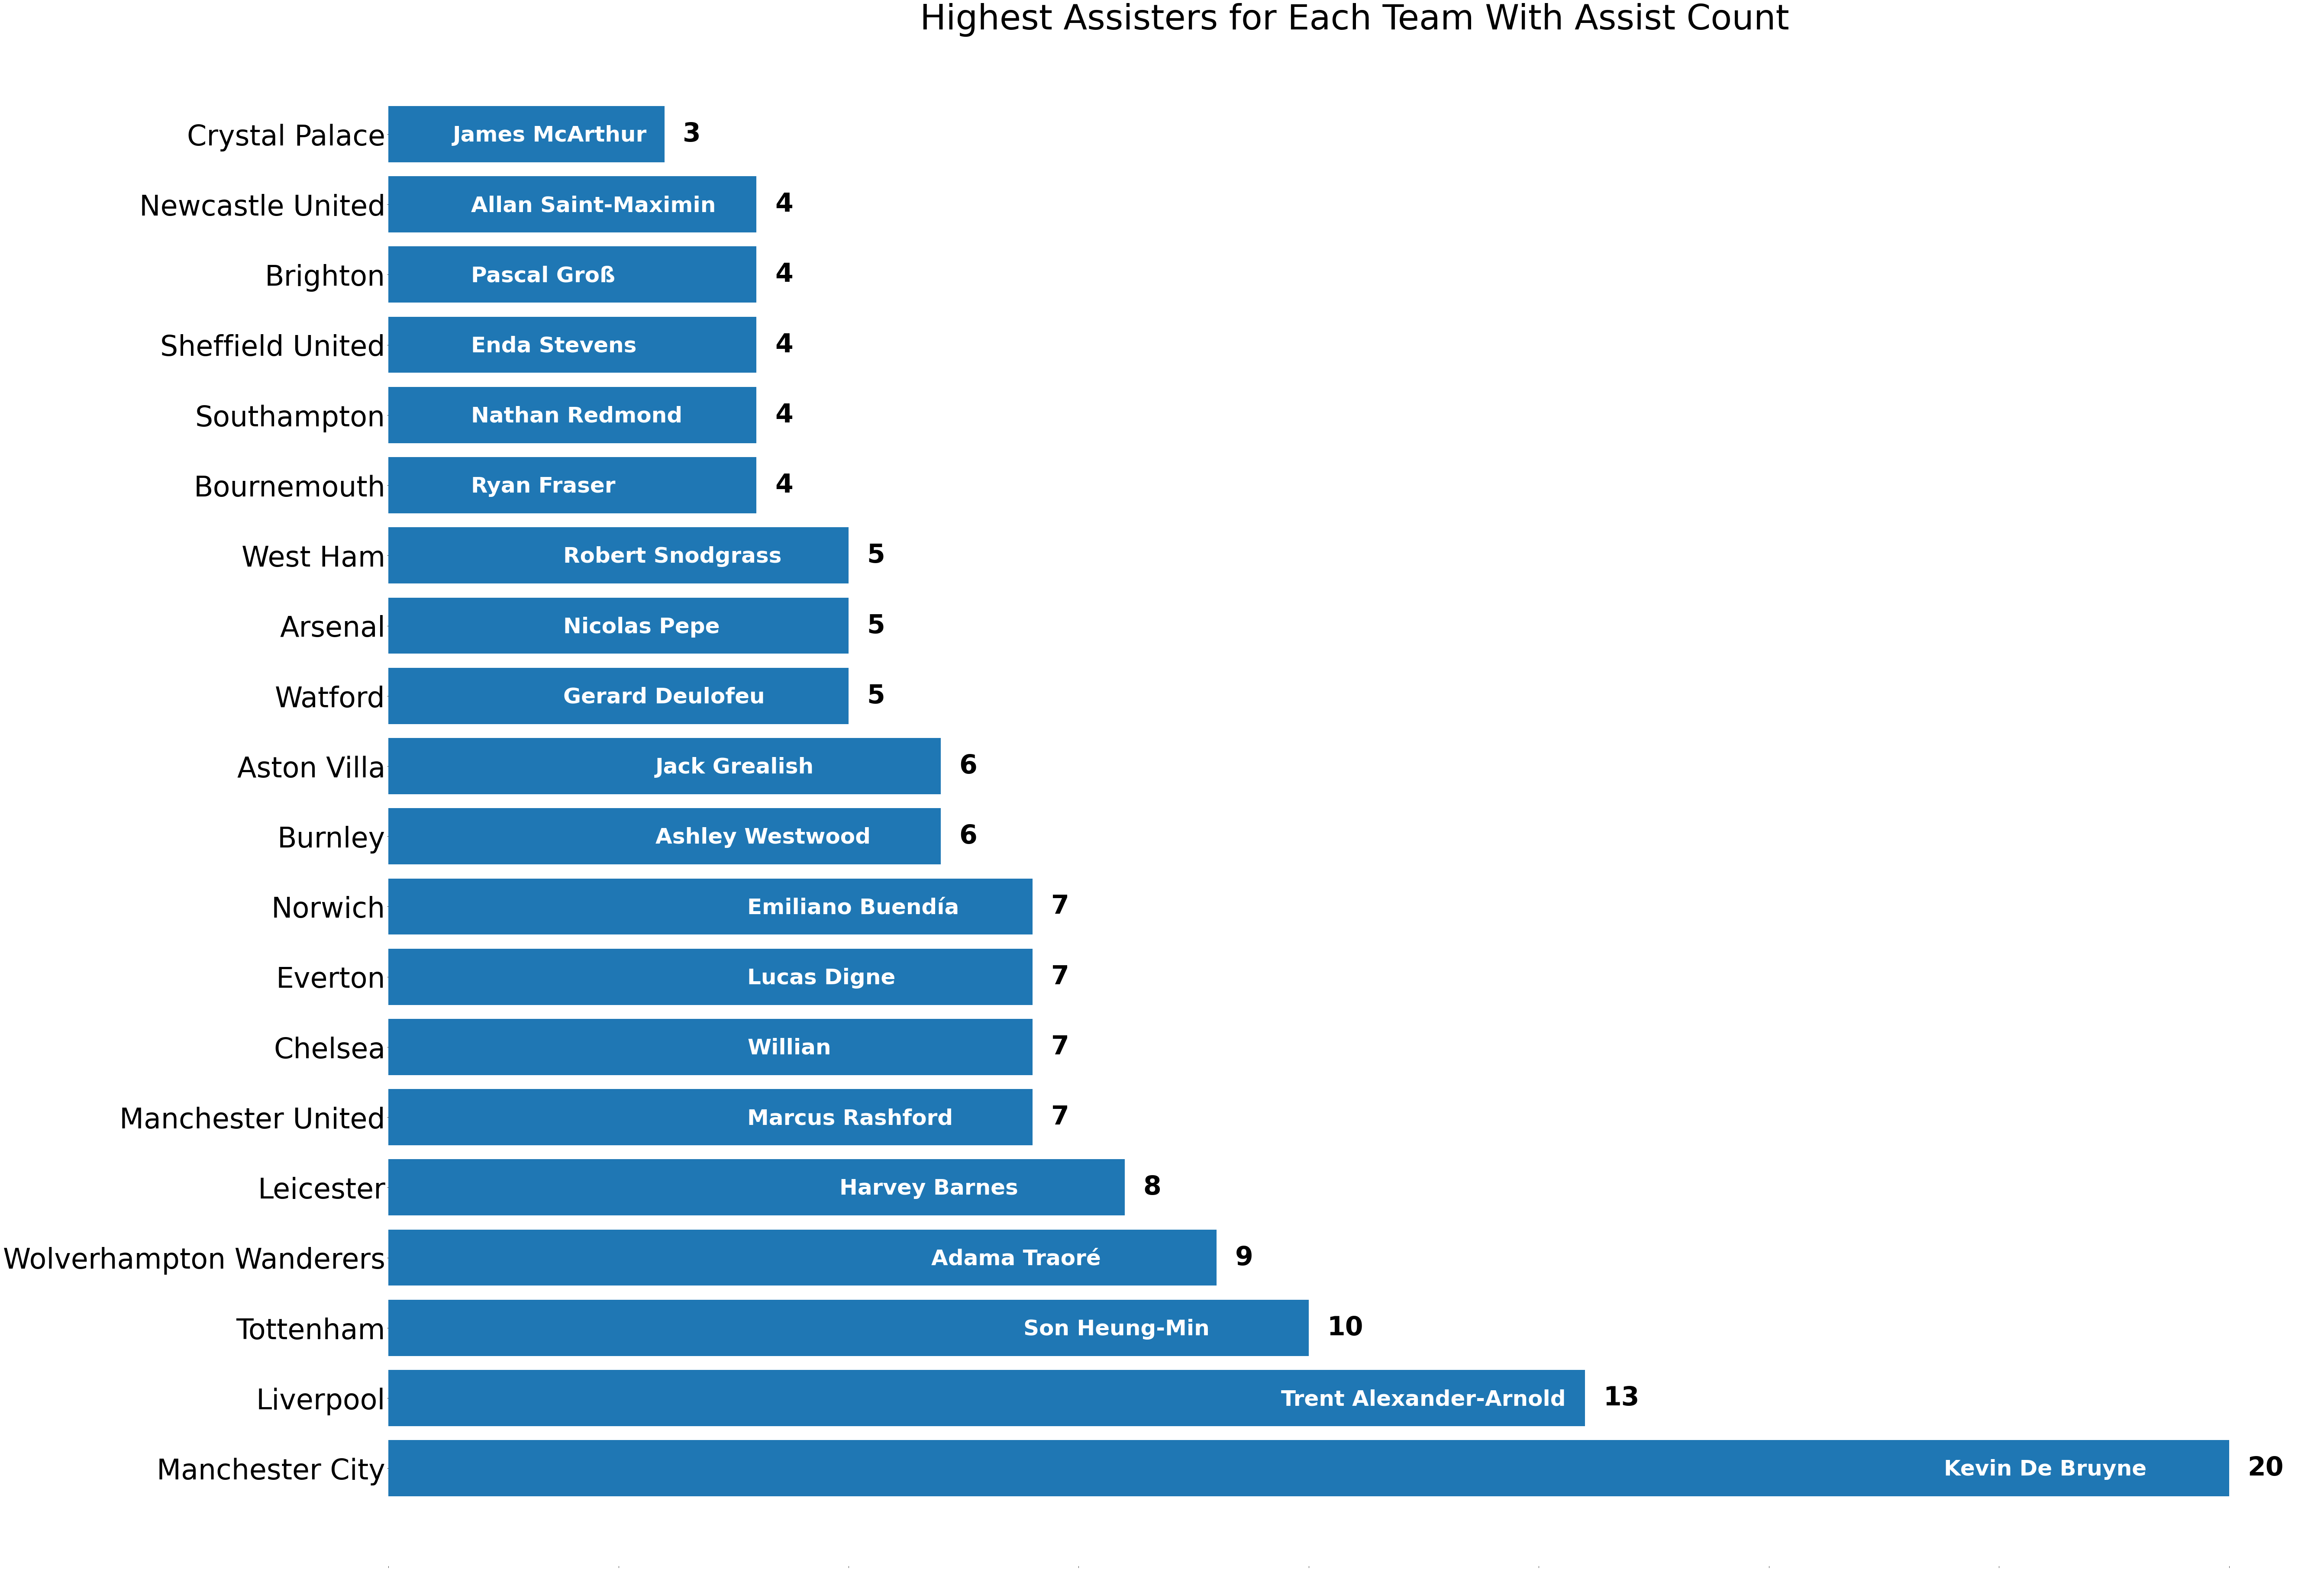

In [10]:
top_team_assists = players.sort_values('A',ascending=False).groupby('Team').head(1).reset_index(drop=True)
top_team_assists

fig, ax = plt.subplots(1, 1, figsize=(80,65))

ax.barh(top_team_assists['Team'], top_team_assists['A'])
ax.set_yticklabels(top_team_assists['Team'], fontsize=65)
ax.set_xticklabels([])
ax.set_title('Highest Assisters for Each Team With Assist Count', fontsize=80)
for i, v in top_team_assists.iterrows():
    if i == 19:
        ax.text(v['A'] - 2.3, i-0.1, v['Player'], color='white', fontweight='bold', fontsize=50)
        ax.text(v['A']+0.2, i-0.1, int(v['A']), color='black', fontweight='bold', fontsize=60)
    elif i == 1:
        ax.text(v['A'] - 3.3, i-0.1, v['Player'], color='white', fontweight='bold', fontsize=50)
        ax.text(v['A']+0.2, i-0.1, int(v['A']), color='black', fontweight='bold', fontsize=60)       
    else:
        ax.text(v['A'] - 3.1, i-0.1, v['Player'], color='white', fontweight='bold', fontsize=50)
        ax.text(v['A']+0.2, i-0.1, int(v['A']), color='black', fontweight='bold', fontsize=60)
    
for key, spine in ax.spines.items():
    spine.set_visible(False)

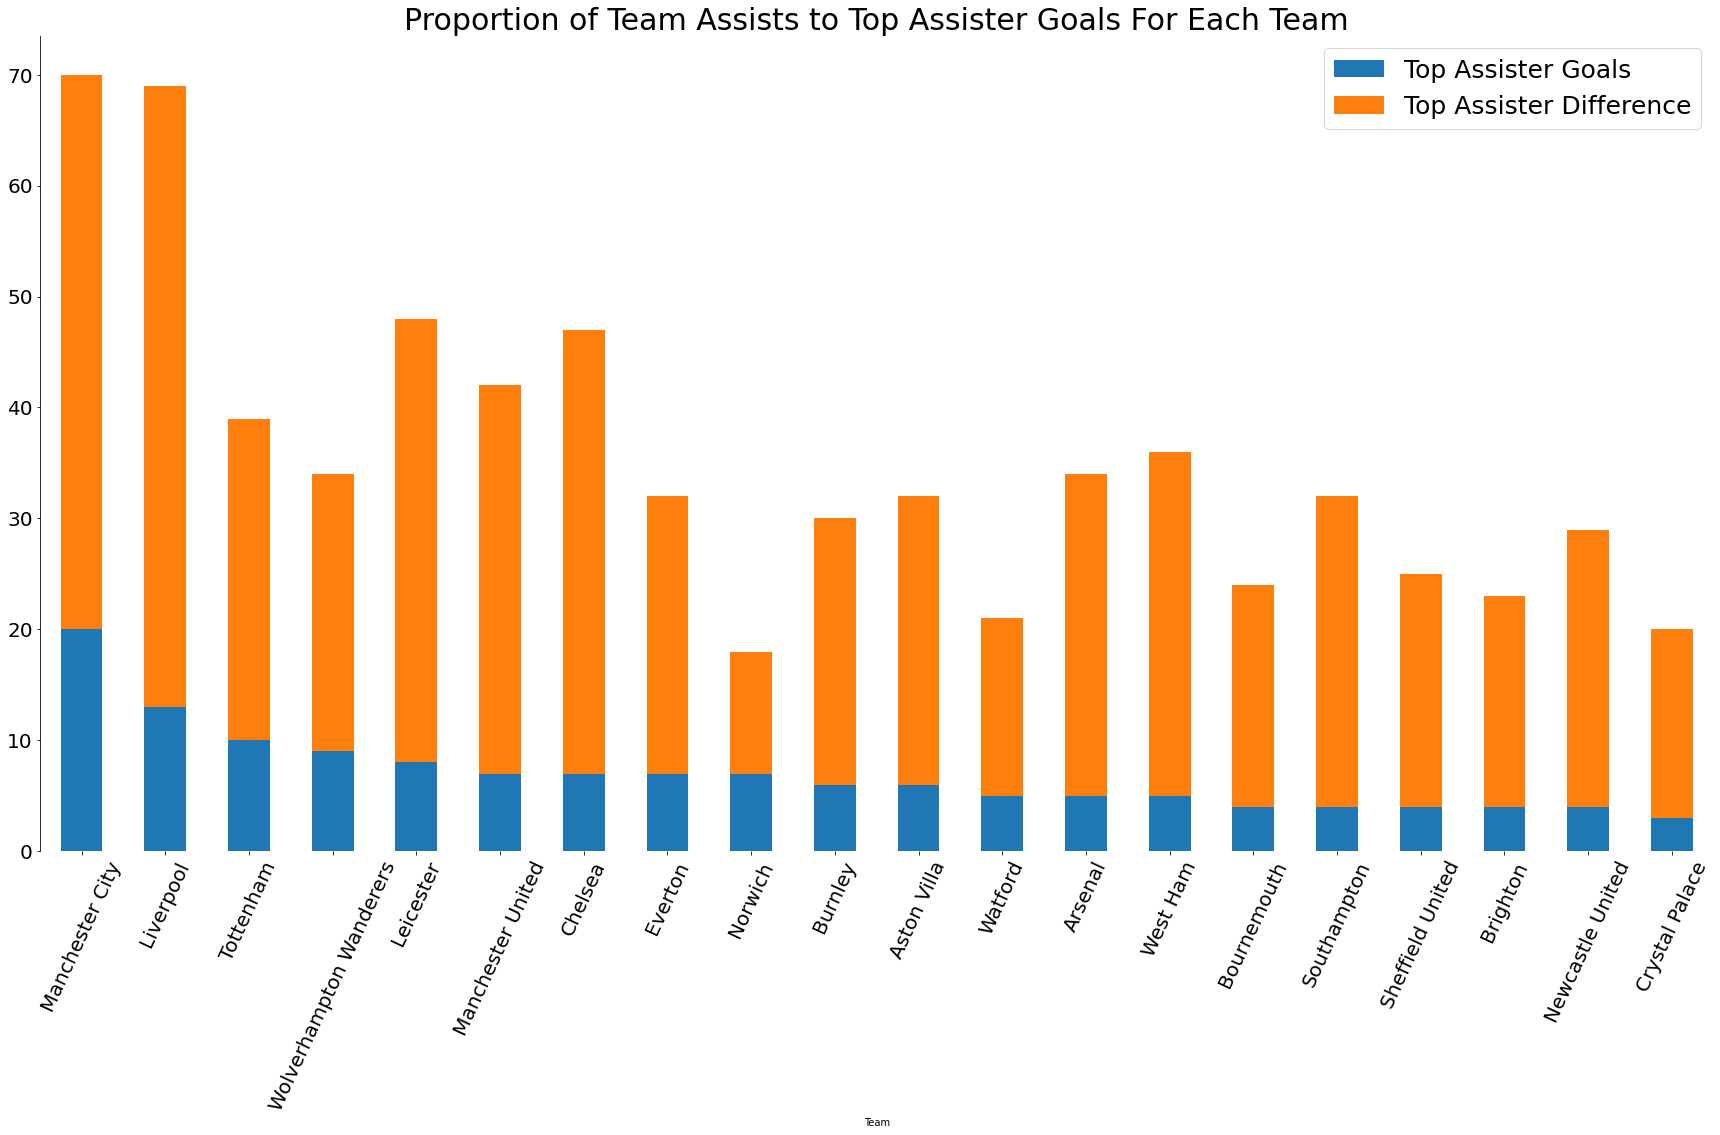

In [11]:
top_team_assists = players.sort_values('A',ascending=False).groupby('Team').head(1)
top_team_assists

def get_team_assists(team):
    team_goals = players.groupby('Team').get_group(team).sum()['A']
    
    return team_goals

top_team_assists['Team Assists'] = top_team_assists['Team'].apply(lambda x: get_team_assists(x))
top_team_assists['Percentage of Team Assits'] = top_team_assists['A'] / top_team_assists['Team Assists']
top_team_assists['Top Assister Difference'] = top_team_assists['Team Assists'] - top_team_assists['A']

top_team_assists = top_team_assists.rename(columns={"A": "Top Assister Goals"})

top_team_assists = top_team_assists.set_index('Team')
top_team_assists

top_team_assists[['Top Assister Goals','Top Assister Difference']].plot.bar(figsize=(30,15), stacked=True)
plt.xticks(fontsize=20, rotation=65)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 25})
plt.title('Proportion of Team Assists to Top Assister Goals For Each Team', fontsize=30)

for pos in ['right','top','bottom']:
    plt.gca().spines[pos].set_visible(False)